In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ml-20m/ratings.csv")

In [3]:
df.columns = ['uid', 'sid', 'rating', 'timestamp']

In [4]:
df.head()

,uid,sid,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
df.count()

uid          20000263
sid          20000263
rating       20000263
timestamp    20000263
dtype: int64

In [6]:
df.describe()

,uid,sid,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [7]:
df.sid.nunique()

26744

In [8]:
df.uid.nunique()

138493

In [9]:
unique_ratings = df.rating.unique()
unique_ratings.sort()
unique_ratings


array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

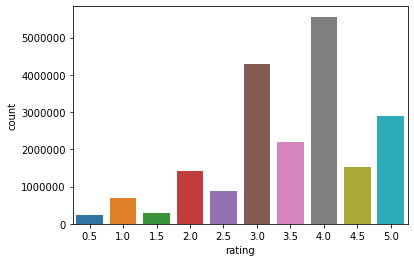

In [10]:
sns.countplot(df.rating)

In [11]:
import re
pattern = r'[0-9][a-z]'
df.loc[df.timestamp.map(lambda x:str(x)).str.contains(pattern)]

,uid,sid,rating,timestamp


In [12]:
import datetime
def convert_time(timestamp):
    date=datetime.datetime.fromtimestamp(
    int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')
    return int(date[0:4])
df['year']=df['timestamp'].apply(convert_time)

In [13]:
years = df.year.unique()
years.sort()
years

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

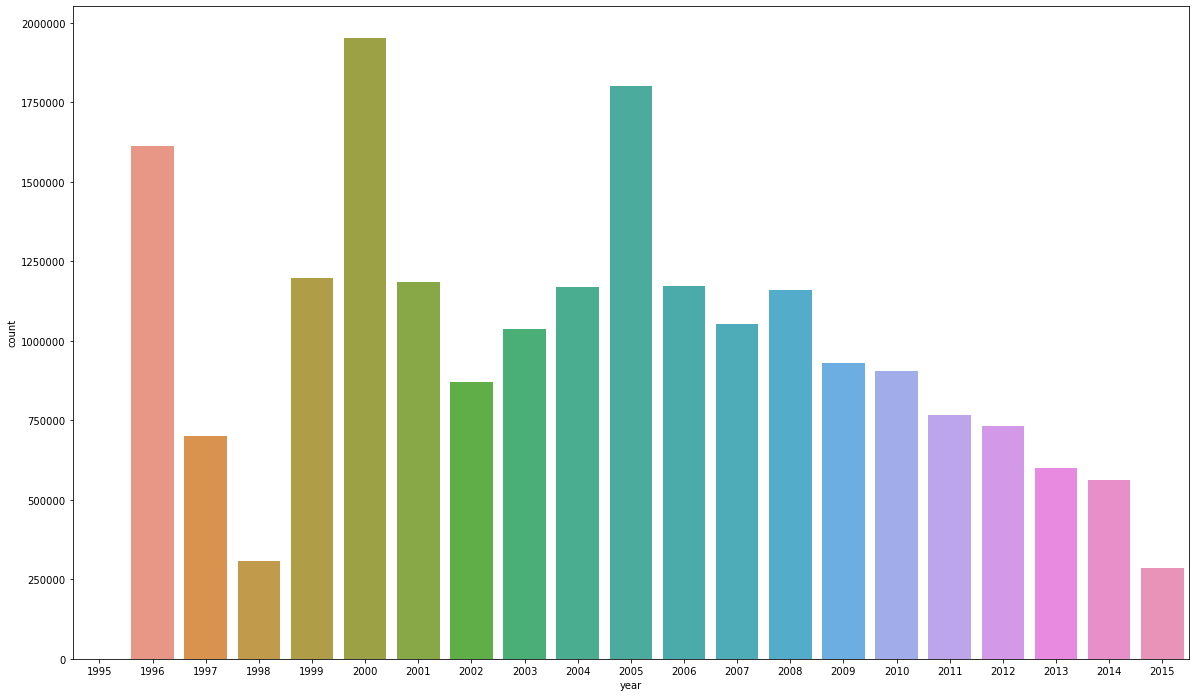

In [14]:
fig1, ax3 = plt.subplots(figsize=(20,12))
sns.countplot(df.year)

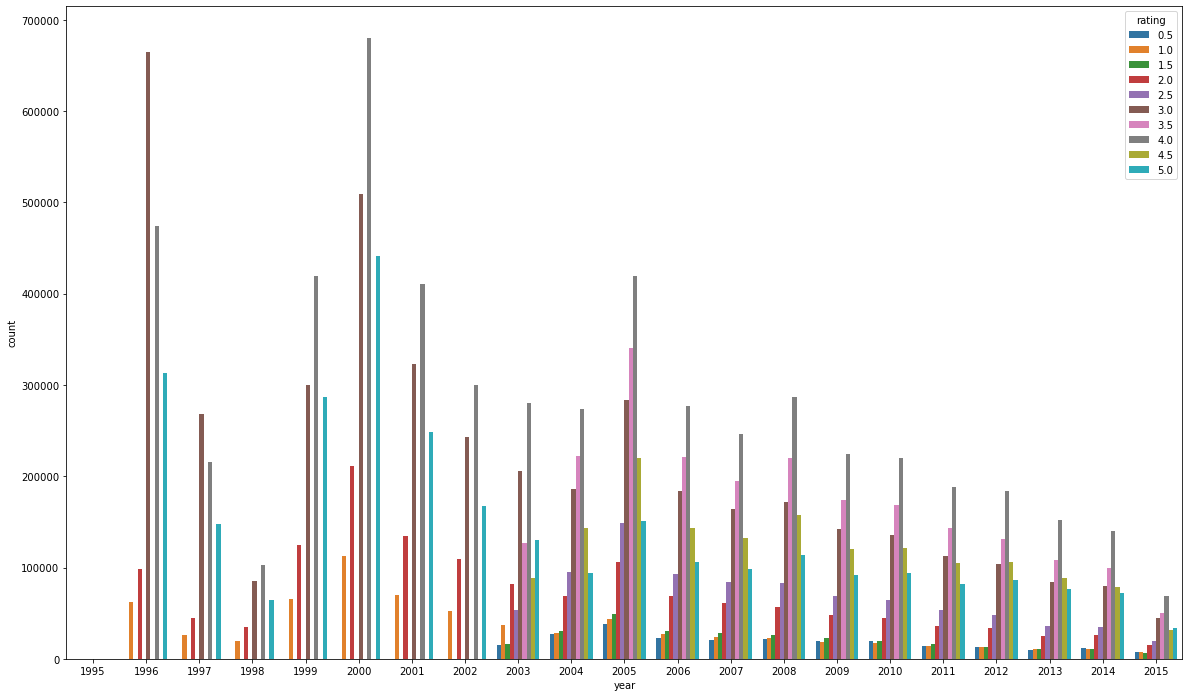

In [15]:
fig1, ax3 = plt.subplots(figsize=(20,12))
sns.countplot(df.year, hue=df.rating)

In [16]:
avg_rates_year=df[['year','rating']].groupby('year').mean()

In [17]:
df.head()

,uid,sid,rating,timestamp,year
0,1,2,3.5,1112486027,2005
1,1,29,3.5,1112484676,2005
2,1,32,3.5,1112484819,2005
3,1,47,3.5,1112484727,2005
4,1,50,3.5,1112484580,2005


In [18]:
movie_df = pd.read_csv("ml-20m/movies.csv")

In [19]:
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [20]:
movie_df.genres.nunique()

1342

In [21]:
def year(title):
    year=re.search(r'\(\d{4}\)', title)
    if year:
        year=year.group()
        return int(year[1:5])
    else:
        return 0

movie_df['movie_year']=movie_df['title'].apply(year)
sub=movie_df[movie_df['movie_year']!=0]

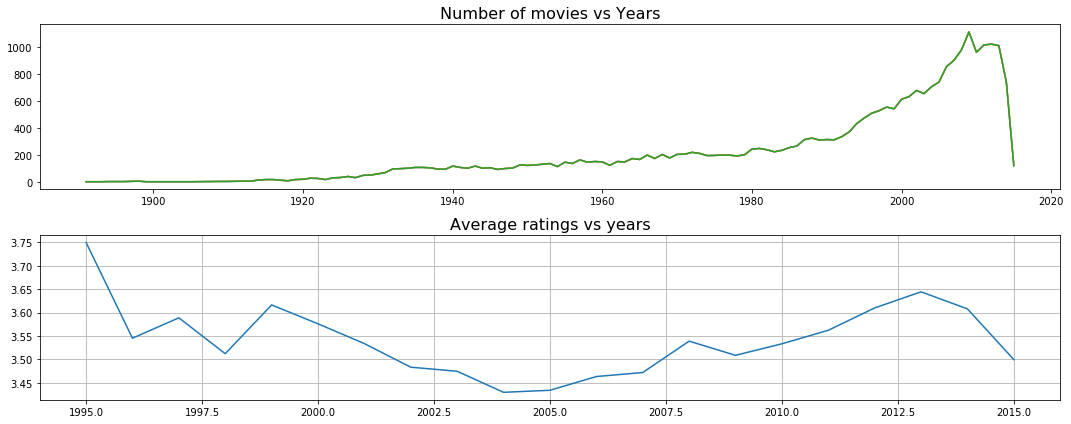

In [22]:
fig1, (ax3,ax4) = plt.subplots(2,1,figsize=(15,6))
plt.subplot(211)
plt.plot(sub.groupby(['movie_year']).count())
plt.title('Number of movies vs Years',fontsize=16)
 
plt.subplot(212)
a2=plt.plot(avg_rates_year)
plt.title('Average ratings vs years',fontsize=16)
plt.grid(True)
plt.tight_layout()

In [23]:
import re
def genres_str(x):
    if x=='(no genres listed)':
        keys=['no_genres']
    else:
        keys= re.sub('[|]', ' ', x)
        keys=keys.split()
    return keys
movie_df['genres_split']=movie_df['genres'].apply(genres_str)
 
all_genres=['Action','Adventure','Animation',"Children",
 "Comedy","Crime","Documentary","Drama",
 "Fantasy",'Film-Noir','Horror','Musical',
 'Mystery','Romance','Sci-Fi','Thriller',
 'War','Western','IMAX','no_genres']
#genres_classify[genre] gives the moviesIds which can be classified to be genre.
values=[]
for i in range(len(all_genres)):
    values.append([])
    
genres_classify=dict(zip(all_genres, values))
 
for i in range(movie_df.shape[0]):
     for genre in movie_df.loc[i,'genres_split']:
         genres_classify[genre].append(movie_df.loc[i,'movieId'])

In [24]:
movie_df

,movieId,title,genres,movie_year,genres_split
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]
...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007,[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,[Comedy]
27275,131258,The Pirates (2014),Adventure,2014,[Adventure]
27276,131260,Rentun Ruusu (2001),(no genres listed),2001,[no_genres]


In [25]:
movie_df_exploded=movie_df.explode('genres_split')

In [26]:
movie_df_exploded

,movieId,title,genres,movie_year,genres_split
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Fantasy
...,...,...,...,...,...
27275,131258,The Pirates (2014),Adventure,2014,Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed),2001,no_genres
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Adventure
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Fantasy


In [27]:
genre_dummy = pd.get_dummies(movie_df_exploded.genres_split, prefix='genre')

In [28]:
genre_dummy

,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27275,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27277,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27277,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
genre_df = genre_dummy.groupby(genre_dummy.index).sum()

In [30]:
genre_df

,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
final_movie_df = pd.merge(movie_df, genre_df, how='inner', on=movie_df.index)

In [32]:
final_movie_df=final_movie_df[['movieId', 'movie_year', 'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Children',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Film-Noir', 'genre_Horror', 'genre_IMAX',
       'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
       'genre_Thriller', 'genre_War', 'genre_Western', 'genre_no_genres']]

In [33]:
final_movie_df.rename(columns={"movieId": "sid"}, inplace=True)

In [34]:
genre_distribution={}
for column in final_movie_df.columns[2:]:
    genre_distribution[column] = final_movie_df.groupby(column).count().iloc[1][0]
genre_distribution

{'genre_Action': 3520,
 'genre_Adventure': 2329,
 'genre_Animation': 1027,
 'genre_Children': 1139,
 'genre_Comedy': 8374,
 'genre_Crime': 2939,
 'genre_Documentary': 2471,
 'genre_Drama': 13344,
 'genre_Fantasy': 1412,
 'genre_Film-Noir': 330,
 'genre_Horror': 2611,
 'genre_IMAX': 196,
 'genre_Musical': 1036,
 'genre_Mystery': 1514,
 'genre_Romance': 4127,
 'genre_Sci-Fi': 1743,
 'genre_Thriller': 4178,
 'genre_War': 1194,
 'genre_Western': 676,
 'genre_no_genres': 246}

In [35]:
sum(list(genre_distribution.values()))

54406

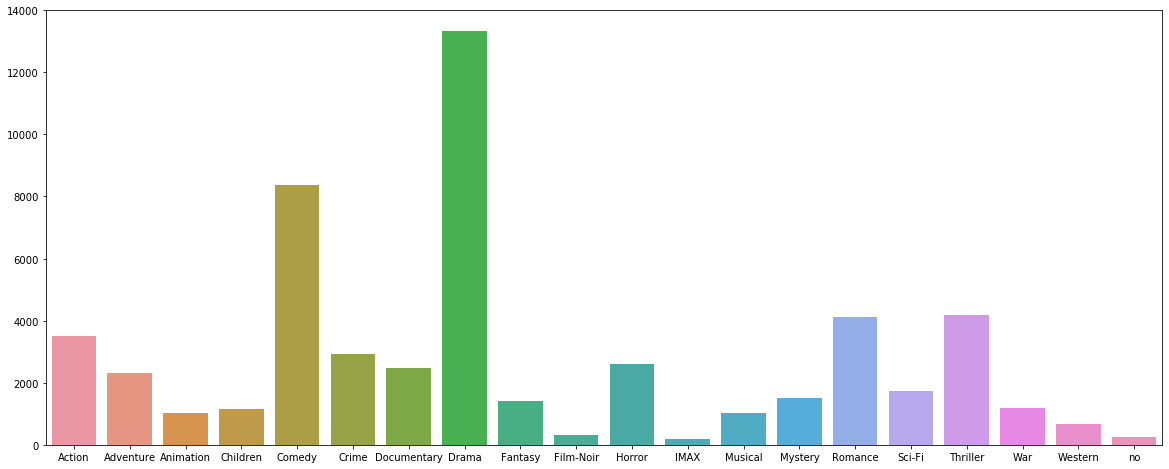

In [36]:
fig1, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(list(map(lambda x: x.split('_')[1], genre_distribution.keys())), list(genre_distribution.values()))

In [37]:
movie_rating_df = pd.merge(df, final_movie_df, how='inner', on='sid')

In [38]:
movie_rating_df

,uid,sid,rating,timestamp,year,movie_year,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres
0,1,2,3.5,1112486027,2005,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5,2,3.0,851527569,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13,2,3.0,849082742,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,29,2,3.0,835562174,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,34,2,3.0,846509384,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000258,138301,121017,3.5,1420558479,2015,1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20000259,138301,121019,4.5,1420558606,2015,1964,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20000260,138301,121021,4.5,1420558687,2015,1961,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20000261,138406,110167,4.5,1396184127,2014,1976,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
genre_distribution_rating={}
for column in final_movie_df.columns[2:]:
    genre_distribution_rating[column] = movie_rating_df.loc[movie_rating_df[column]==1].count()[0]
genre_distribution_rating

{'genre_Action': 5614208,
 'genre_Adventure': 4380351,
 'genre_Animation': 1140476,
 'genre_Children': 1669249,
 'genre_Comedy': 7502234,
 'genre_Crime': 3298335,
 'genre_Documentary': 244619,
 'genre_Drama': 8857853,
 'genre_Fantasy': 2111403,
 'genre_Film-Noir': 216689,
 'genre_Horror': 1482737,
 'genre_IMAX': 492366,
 'genre_Musical': 870915,
 'genre_Mystery': 1557282,
 'genre_Romance': 3802002,
 'genre_Sci-Fi': 3150141,
 'genre_Thriller': 5313506,
 'genre_War': 1048618,
 'genre_Western': 423714,
 'genre_no_genres': 361}

In [40]:
tot_count = sum(list(genre_distribution_rating.values()))

In [41]:
genre_share_pct = {genre:(count/tot_count)*100 for genre, count in genre_distribution_rating.items()}


In [42]:
genre_share_pct

{'genre_Action': 10.557575213025602,
 'genre_Adventure': 8.23729458223705,
 'genre_Animation': 2.144676711060685,
 'genre_Children': 3.1390397125948613,
 'genre_Comedy': 14.108027298012098,
 'genre_Crime': 6.2025524954285265,
 'genre_Documentary': 0.46000851607833376,
 'genre_Drama': 16.657282607524422,
 'genre_Fantasy': 3.970514804137627,
 'genre_Film-Noir': 0.40748586716689245,
 'genre_Horror': 2.7883020006804062,
 'genre_IMAX': 0.9258992679531224,
 'genre_Musical': 1.63776451044425,
 'genre_Mystery': 2.928484630938315,
 'genre_Romance': 7.149703408757524,
 'genre_Sci-Fi': 5.923872172020645,
 'genre_Thriller': 9.992102045357566,
 'genre_War': 1.9719368083142772,
 'genre_Western': 0.7967984840981898,
 'genre_no_genres': 0.0006788641696036631}

([<matplotlib.patches.Wedge at 0x1d115d7d888>,
 [Text(1.0400477047496786, 0.35819097119403437, 'Action'),
  Text(0.6645328326184222, 0.8765820636837923, 'Adventure'),
  Text(0.34863548886130685, 1.0432896510108962, 'Animation'),
  Text(0.17145898739645157, 1.0865550219114464, 'Children'),
  Text(-0.4134439286351636, 1.0193449454795576, 'Comedy'),
  Text(-0.9392698206036407, 0.5725139335450316, 'Crime'),
  Text(-1.037729809698605, 0.36485180835908904, 'Documentary'),
  Text(-1.0781457179426113, -0.2181783923352897, 'Drama'),
  Text(-0.7278725153361945, -0.8247433548796629, 'Fantasy'),
  Text(-0.6079217668603882, -0.9167503069960456, 'Film-Noir'),
  Text(-0.51297451835008, -0.9730658474756493, 'Horror'),
  Text(-0.39620151993021746, -1.0261697498976403, 'IMAX'),
  Text(-0.3123589416349172, -1.0547188685051172, 'Musical'),
  Text(-0.15836634597832208, -1.088540353161735, 'Mystery'),
  Text(0.18842474973514658, -1.0837417190858936, 'Romance'),
  Text(0.6054578308734481, -0.9183794504637064

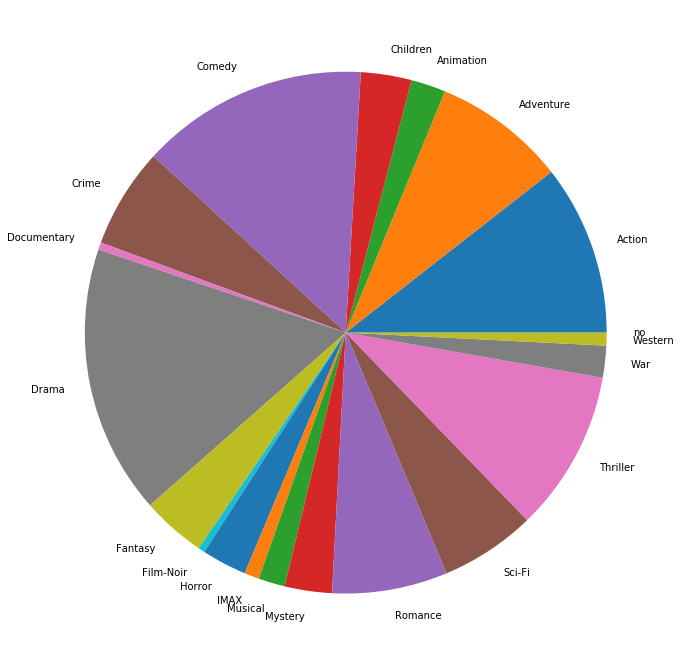

In [43]:
fig1, ax3 = plt.subplots(figsize=(12, 12))
plt.pie([float(v) for v in genre_share_pct.values()], labels=[str(k).split('_')[1] for k in genre_share_pct.keys()], autopct=None)

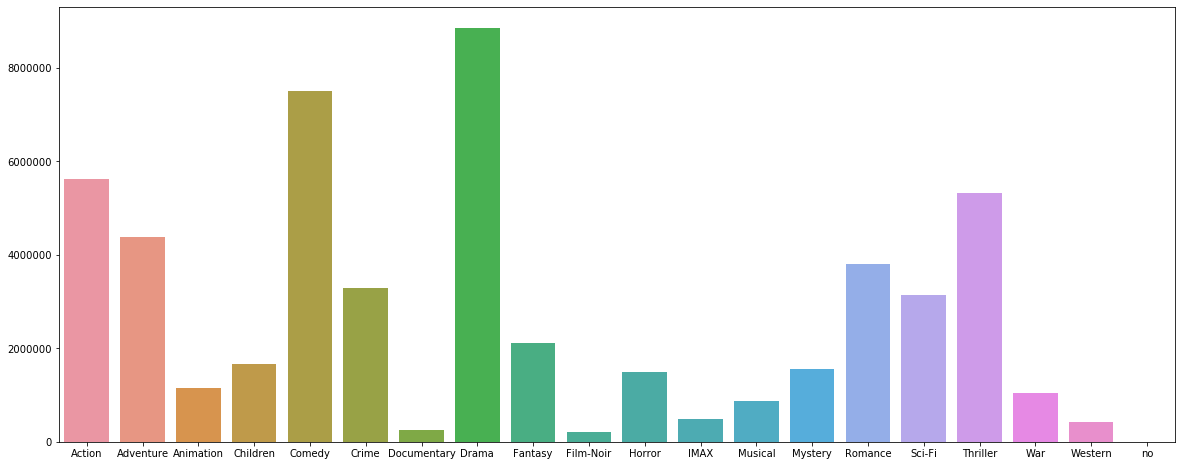

In [44]:
fig1, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(list(map(lambda x: x.split('_')[1], genre_distribution_rating.keys())), list(genre_distribution_rating.values()))

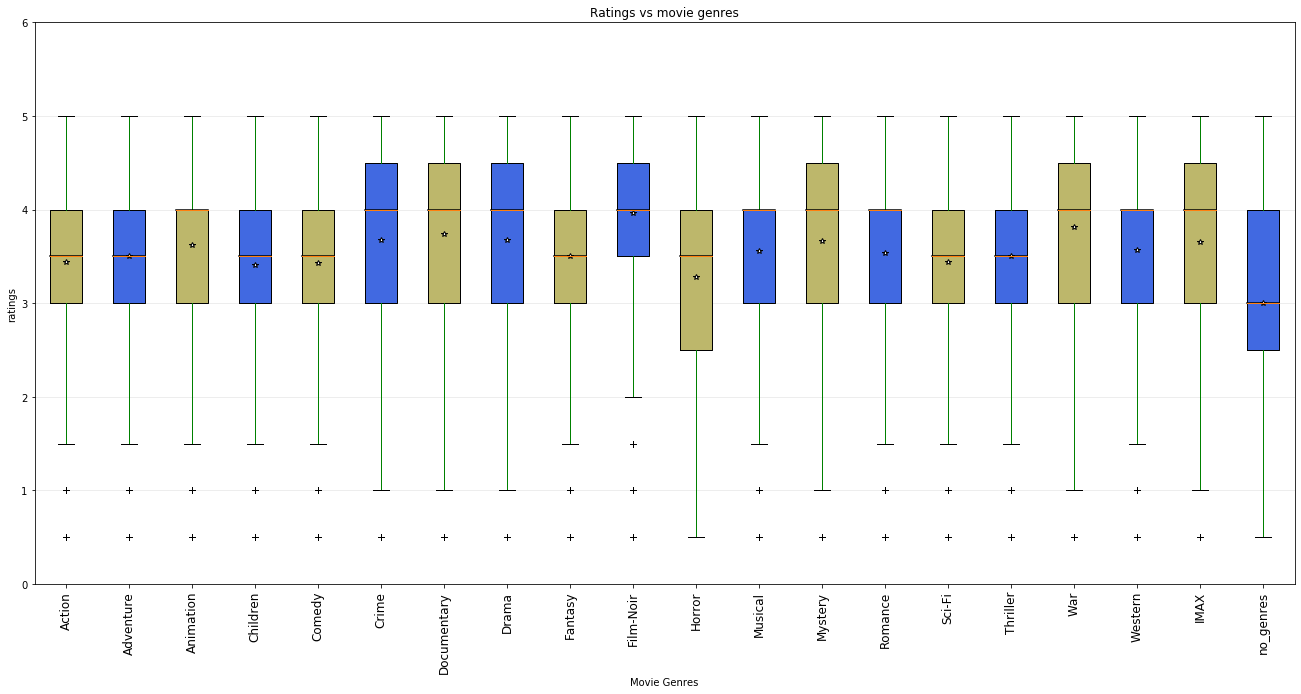

In [45]:
from matplotlib.patches import Polygon
import numpy as np

data=[]
for g in all_genres:
    #sub is all ratings for the movies in the genres g.
    sub=np.array(movie_rating_df[movie_rating_df['sid'].isin(genres_classify[g])].rating)
    data.append(sub)
    
#boxplot the ratings vs genres
fig, ax1 = plt.subplots(figsize=(20, 12))
fig.canvas.set_window_title('Boxplot of Movie Ratings VS Genres')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
 
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
 
# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
 alpha=0.5)
 
# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Ratings vs movie genres')
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('ratings')
 
# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
plt.setp(bp['whiskers'], color='green')
#plt.setp(bp['fliers'], color='red', marker='+')
numBoxes=20
 
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
    color='w', marker='*', markeredgecolor='k')
 
# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 6
bottom = 0
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=all_genres)
plt.setp(xtickNames, rotation=90, fontsize=12)
plt.savefig('genres_ratings.png')

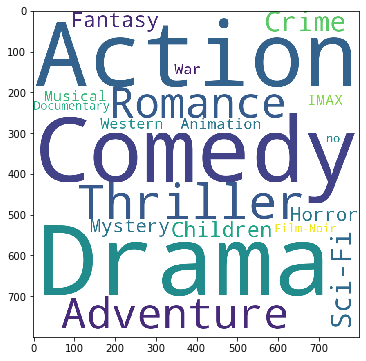

In [46]:
from wordcloud import WordCloud

fig1, ax3 = plt.subplots(figsize=(15,6))
wc = WordCloud(background_color="white",width=800,height=800, max_words=30,relative_scaling=0,normalize_plurals=False).generate_from_frequencies(dict(zip([genre.split('_')[1] for genre in genre_distribution_rating.keys()], genre_distribution_rating.values())))
plt.imshow(wc)

In [47]:
from datetime import datetime

movie_rating_df['rating_year'] = movie_rating_df['timestamp'].apply(lambda x:datetime.fromtimestamp(x).year)
movie_rating_df['rating_month'] = movie_rating_df['timestamp'].apply(lambda x:datetime.fromtimestamp(x).month)

In [48]:
movie_rating_df.head()

,uid,sid,rating,timestamp,year,movie_year,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres,rating_year,rating_month
0,1,2,3.5,1112486027,2005,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,2005,4
1,5,2,3.0,851527569,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,1996,12
2,13,2,3.0,849082742,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,1996,11
3,29,2,3.0,835562174,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,1996,6
4,34,2,3.0,846509384,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,0,1996,10


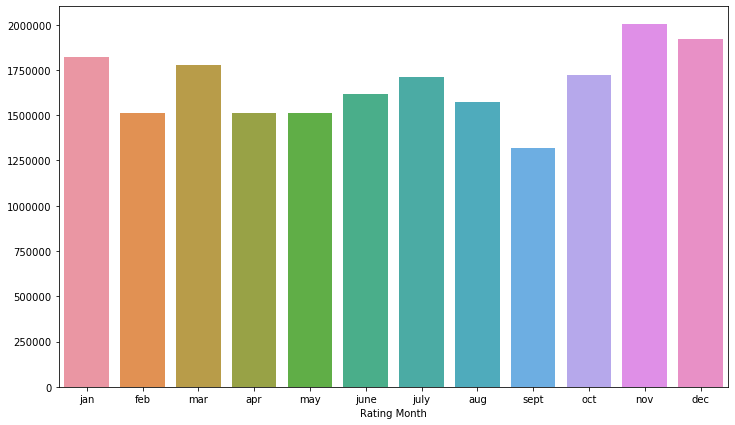

In [49]:
plt.figure(figsize=(12,7))
monthly_release_counts = movie_rating_df.groupby(movie_rating_df.rating_month).size()
sns.barplot(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], monthly_release_counts.values);
plt.xlabel('Rating Month');

In [50]:
day_week_map = {0:'monday', 1:'tuesday', 2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
day_week_map[datetime.fromtimestamp(851527569).weekday()]

'wednesday'

In [51]:
movie_rating_df['rating_week'] = movie_rating_df['timestamp'].apply(lambda x:day_week_map[datetime.fromtimestamp(x).weekday()])

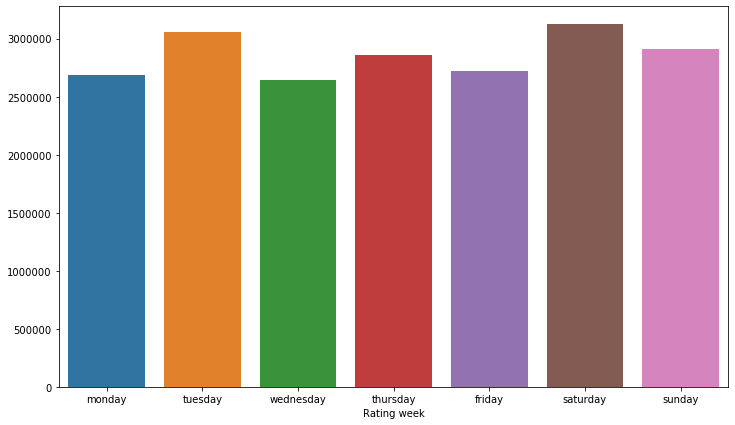

In [52]:
plt.figure(figsize=(12,7))
weekly_release_counts = movie_rating_df.groupby(movie_rating_df.rating_week).size()
sns.barplot(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], weekly_release_counts.values);
plt.xlabel('Rating week');

In [53]:
most_ratings_by_user = movie_rating_df.groupby(movie_rating_df.uid).size().sort_values(ascending=False)

In [54]:
most_ratings_by_user[:1000]

uid
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
74241     1253
114531    1253
22352     1252
80989     1252
54478     1251
Length: 1000, dtype: int64

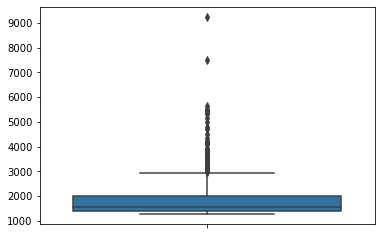

In [55]:
sns.boxplot(most_ratings_by_user[:1000], orient='v')

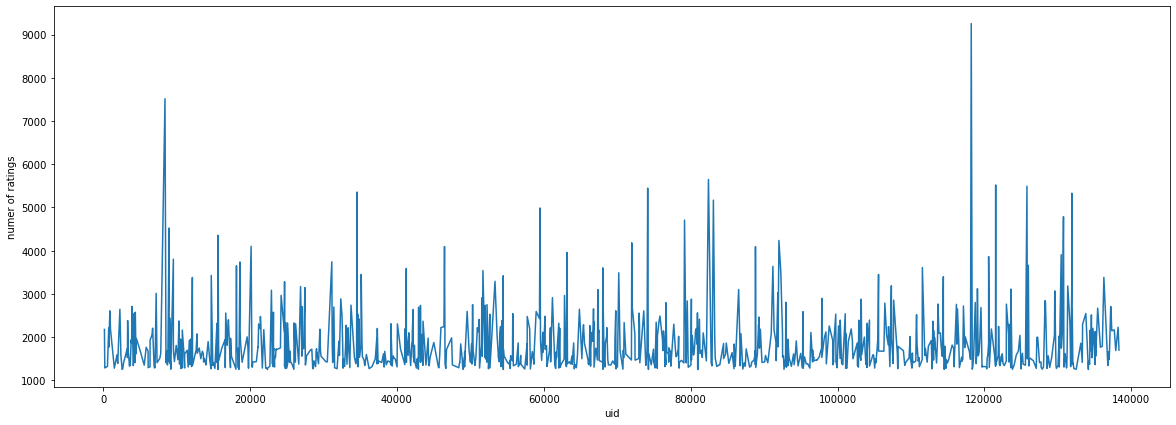

In [56]:
fig, ax1 = plt.subplots(figsize=(20, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.lineplot(x=most_ratings_by_user[:1000].index, y=most_ratings_by_user[:1000].values)

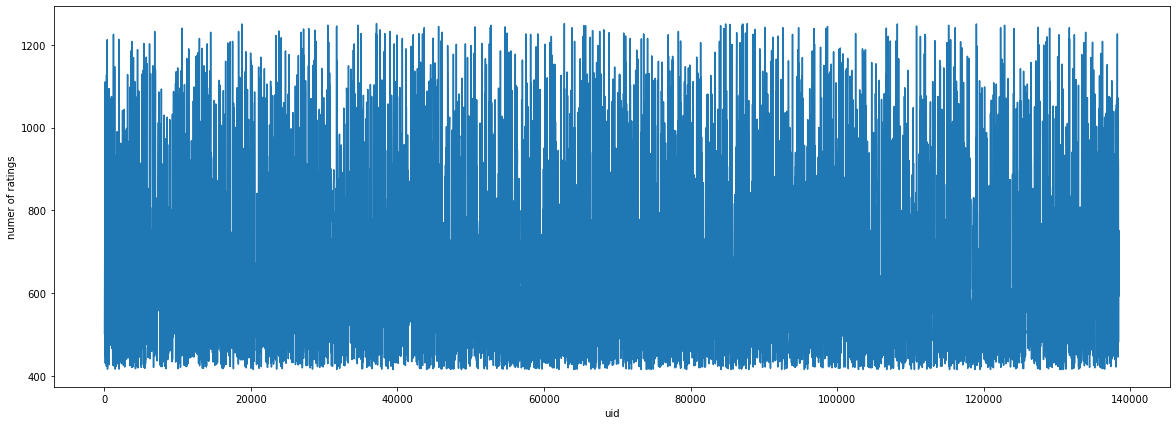

In [57]:
fig, ax1 = plt.subplots(figsize=(20, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.lineplot(x=most_ratings_by_user[1000:10000].index, y=most_ratings_by_user[1000:10000].values)

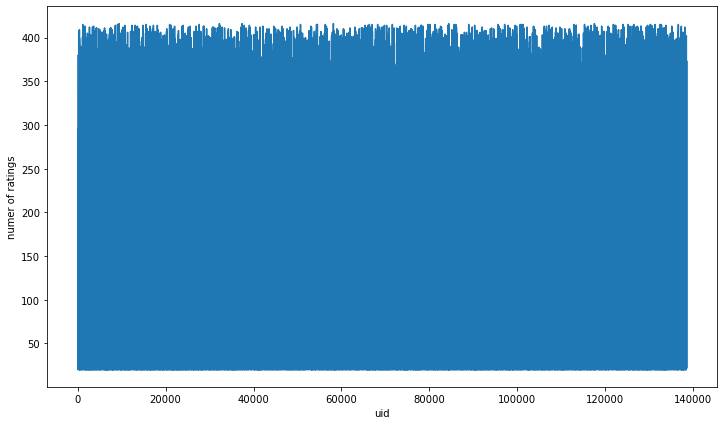

In [58]:
fig, ax1 = plt.subplots(figsize=(12, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.lineplot(x=most_ratings_by_user[10000:].index, y=most_ratings_by_user[10000:].values)

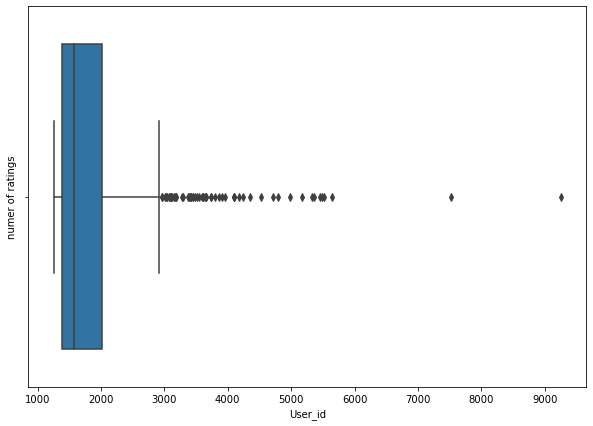

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.boxplot(most_ratings_by_user[:1000], orient='h')

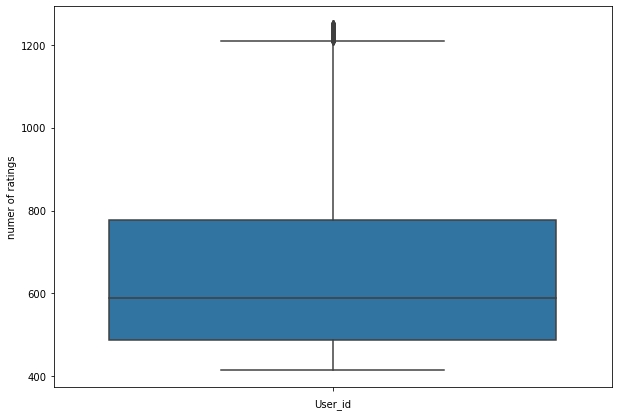

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.boxplot(most_ratings_by_user[1000:10000], orient='v')

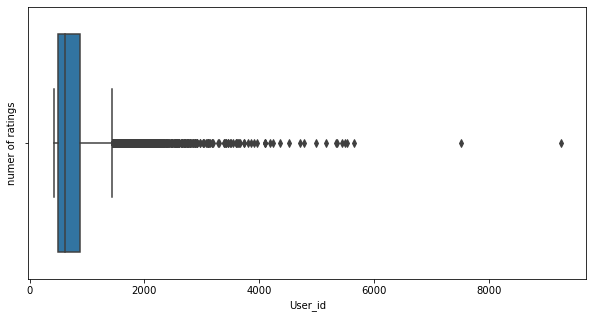

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 5))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('User_id')
ax1.set_ylabel('numer of ratings')

sns.boxplot(most_ratings_by_user[:10000])

In [62]:
percentile_list = list()
percentile_list.append((10, np.percentile(most_ratings_by_user, 10)))
percentile_list.append((25, np.percentile(most_ratings_by_user, 25)))
percentile_list.append((50, np.percentile(most_ratings_by_user, 50)))
percentile_list.append((75, np.percentile(most_ratings_by_user, 75)))
percentile_list.append((90, np.percentile(most_ratings_by_user, 90)))

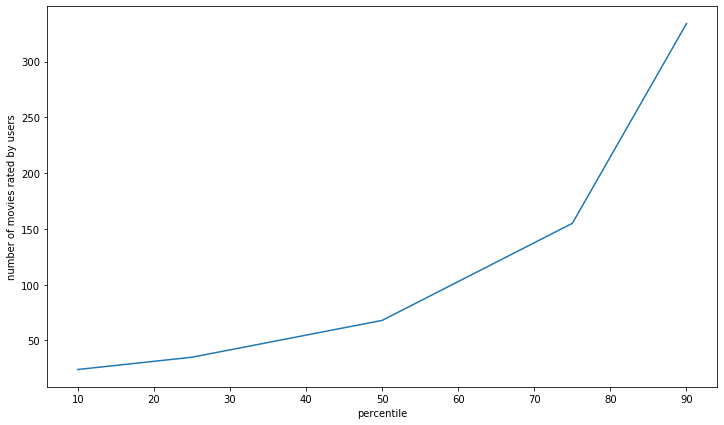

In [63]:
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.set_xlabel('percentile')
ax1.set_ylabel('number of movies rated by users')

sns.lineplot(x=list(dict(percentile_list).keys()), y=list(dict(percentile_list).values()))



In [64]:
np.percentile(most_ratings_by_user, 90)

334.0

In [65]:
movie_rting_split = movie_rating_df.groupby(movie_rating_df.rating).count()['uid']

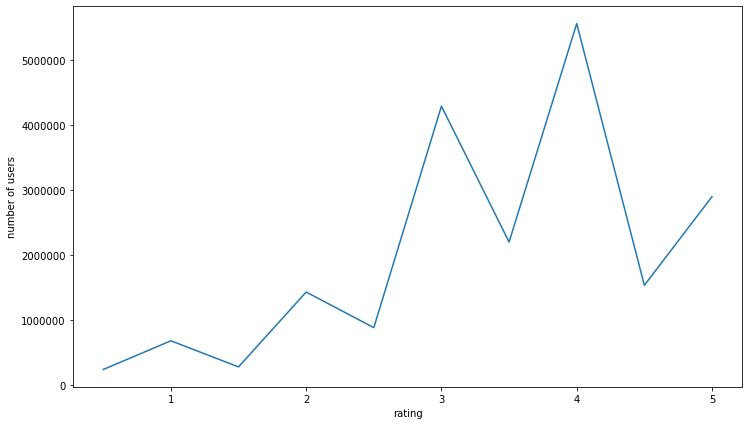

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('ratings')
ax1.set_ylabel('number of users')

sns.lineplot(x=movie_rting_split.index, y=movie_rting_split.values)

In [67]:
movie_rating_count = movie_rating_df.groupby(movie_rating_df.sid).size().sort_values()

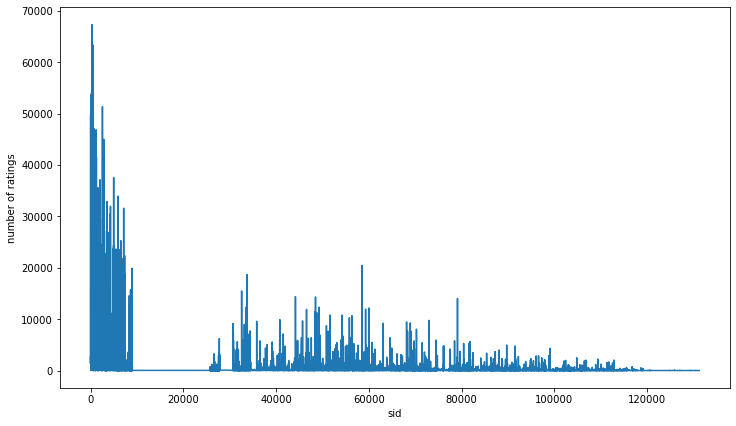

In [68]:
fig, ax1 = plt.subplots(figsize=(12, 7))


# plt.figure(figsize=(12,7))
ax1.set_xlabel('movieId')
ax1.set_ylabel('number of ratings')

sns.lineplot(x=movie_rating_count.index, y=movie_rating_count.values)

In [69]:
movie_rating_count_df = pd.DataFrame(movie_rating_count)
movie_rating_count_df = movie_rating_count_df.reset_index()
movie_rating_count_df.columns = ['sid', 'number of ratings']

In [70]:
movie_rating_count_df

,sid,number of ratings
0,131262,1
1,84436,1
2,84442,1
3,84500,1
4,84534,1
...,...,...
26739,480,59715
26740,593,63299
26741,318,63366
26742,356,66172


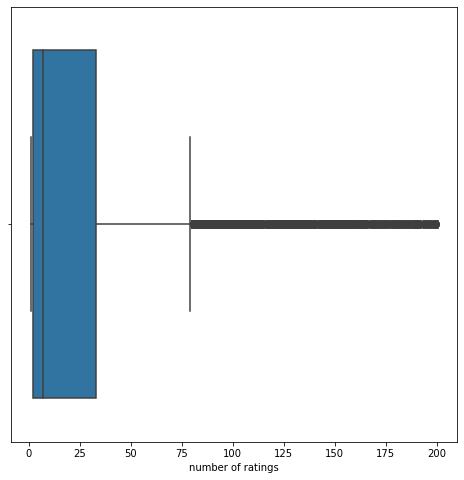

In [71]:
fig, ax1 = plt.subplots(figsize=(8, 8))


# plt.figure(figsize=(12,7))
# ax1.set_xlabel('')
# ax1.set_ylabel('number of movies')

sns.boxplot(movie_rating_count_df['number of ratings'][:20000])

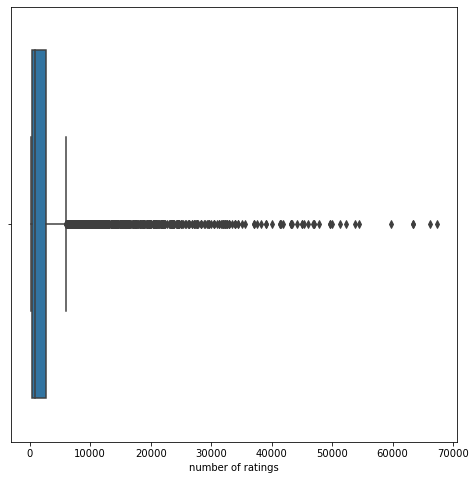

In [72]:
fig, ax1 = plt.subplots(figsize=(8, 8))


# plt.figure(figsize=(12,7))
# ax1.set_xlabel('')
# ax1.set_ylabel('number of movies')

sns.boxplot(movie_rating_count_df['number of ratings'][20000:])

In [73]:
np.percentile(movie_rating_count_df['number of ratings'], 98)

8835.779999999984

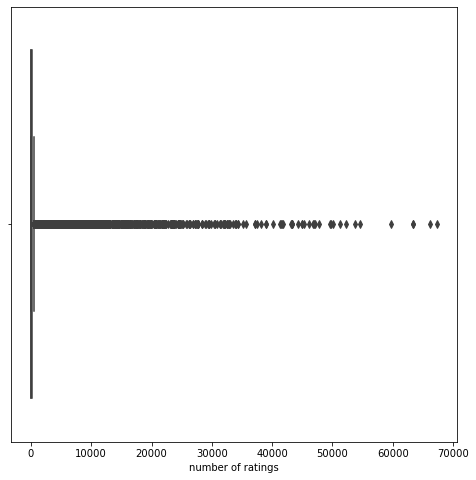

In [74]:
fig, ax1 = plt.subplots(figsize=(8, 8))


# plt.figure(figsize=(12,7))
# ax1.set_xlabel('')
# ax1.set_ylabel('number of movies')

sns.boxplot(movie_rating_count_df['number of ratings'])

In [75]:
user1=movie_rating_df.loc[movie_rating_df.uid==1]

In [76]:
user1

,uid,sid,rating,timestamp,year,movie_year,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres,rating_year,rating_month,rating_week
0,1,2,3.5,1112486027,2005,1995,0,1,0,1,...,0,0,0,0,0,0,0,2005,4,sunday
22243,1,29,3.5,1112484676,2005,1995,0,1,0,0,...,1,0,1,0,0,0,0,2005,4,sunday
30763,1,32,3.5,1112484819,2005,1995,0,0,0,0,...,1,0,1,1,0,0,0,2005,4,sunday
75743,1,47,3.5,1112484727,2005,1995,0,0,0,0,...,1,0,0,1,0,0,0,2005,4,sunday
118992,1,50,3.5,1112484580,2005,1995,0,0,0,0,...,1,0,0,1,0,0,0,2005,4,sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473338,1,8507,5.0,1094786027,2004,1932,0,0,0,0,...,0,0,0,0,0,0,0,2004,9,friday
2474576,1,8636,4.5,1112485493,2005,2004,1,1,0,0,...,0,0,1,0,0,0,0,2005,4,sunday
2490288,1,8690,3.5,1112484795,2005,1972,0,0,0,0,...,0,0,1,0,1,0,0,2005,4,sunday
2490932,1,8961,4.0,1112485629,2005,2004,1,1,1,1,...,0,0,0,0,0,0,0,2005,4,sunday


In [77]:
user1 = user1.sort_values(by='timestamp')

In [78]:
user1.genre_Action

688720     0
665275     0
1699345    1
1471069    0
746976     0
          ..
2315465    1
2452075    0
2070989    1
2021206    0
1490943    0
Name: genre_Action, Length: 175, dtype: uint8

In [79]:
user1.loc[user1.genre_Action==1].count()

uid                  66
sid                  66
rating               66
timestamp            66
year                 66
movie_year           66
genre_Action         66
genre_Adventure      66
genre_Animation      66
genre_Children       66
genre_Comedy         66
genre_Crime          66
genre_Documentary    66
genre_Drama          66
genre_Fantasy        66
genre_Film-Noir      66
genre_Horror         66
genre_IMAX           66
genre_Musical        66
genre_Mystery        66
genre_Romance        66
genre_Sci-Fi         66
genre_Thriller       66
genre_War            66
genre_Western        66
genre_no_genres      66
rating_year          66
rating_month         66
rating_week          66
dtype: int64

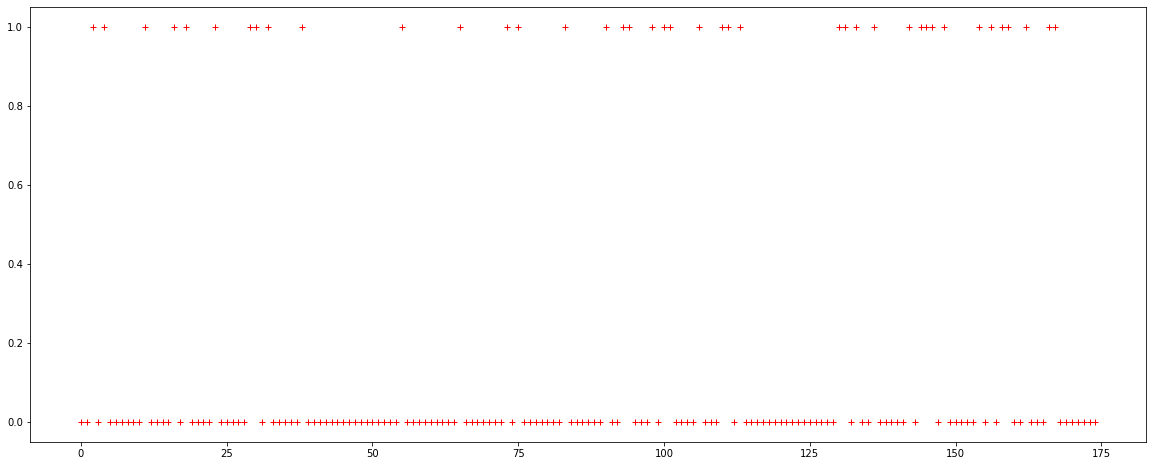

In [80]:
fig, ax1 = plt.subplots(figsize=(20, 8))

plt.plot(list(user1.genre_Comedy), 'r+')

In [81]:
movie_rating_df.head()

,uid,sid,rating,timestamp,year,movie_year,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_no_genres,rating_year,rating_month,rating_week
0,1,2,3.5,1112486027,2005,1995,0,1,0,1,...,0,0,0,0,0,0,0,2005,4,sunday
1,5,2,3.0,851527569,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,1996,12,wednesday
2,13,2,3.0,849082742,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,1996,11,wednesday
3,29,2,3.0,835562174,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,1996,6,monday
4,34,2,3.0,846509384,1996,1995,0,1,0,1,...,0,0,0,0,0,0,0,1996,10,monday


In [82]:
f={23:45, 56:78}
set(f.values())

{45, 78}

In [83]:
sample_118205 = movie_rating_df.loc[movie_rating_df.uid == 118205]

In [84]:
sample_118205_new = pd.merge(sample_118205, movie_df, left_on='sid', right_on='movieId') 

In [85]:
sample_118205_new.genres.nunique()

757

In [86]:
movie_df.genres.nunique()

1342

-----------

For movie lens 1M dataset

In [87]:
M1_df = pd.read_csv("ml-1m/ratings.dat", sep='::', header=None)
M1_df.columns = ['uid', 'sid', 'rating', 'timestamp']

M1_movie_df = pd.read_csv('ml-1m/movies.dat', sep='::', header=None)
M1_movie_df.columns = ['sid', 'title', 'genres']

C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [88]:
M1_df.count()

uid          1000209
sid          1000209
rating       1000209
timestamp    1000209
dtype: int64

In [89]:
debug_issue_df = pd.merge(M1_df, M1_movie_df, on='sid')

In [90]:
from collections import Counter

ge_cnt = [k[0] for k in list(debug_issue_df.groupby(['uid', 'genres']).count().index)]
cnt = Counter()
for ge in ge_cnt:
    cnt[ge] += 1

In [91]:
cnt.most_common()

[(4169, 261),
 (1680, 260),
 (4277, 258),
 (889, 252),
 (1181, 249),
 (1941, 245),
 (4510, 241),
 (4508, 240),
 (5367, 238),
 (2909, 233),
 (4227, 228),
 (550, 227),
 (5954, 227),
 (424, 226),
 (3618, 226),
 (4344, 226),
 (3841, 225),
 (5795, 225),
 (5831, 225),
 (2063, 224),
 (4448, 224),
 (1015, 223),
 (1449, 223),
 (3824, 222),
 (549, 219),
 (4447, 219),
 (1980, 216),
 (1088, 215),
 (3808, 215),
 (4064, 215),
 (4725, 214),
 (1447, 213),
 (3391, 213),
 (2181, 209),
 (195, 206),
 (1698, 206),
 (2529, 206),
 (678, 205),
 (1340, 205),
 (1880, 205),
 (4732, 205),
 (1010, 204),
 (1150, 204),
 (4386, 204),
 (4808, 204),
 (4979, 203),
 (2304, 202),
 (1635, 201),
 (1647, 201),
 (3163, 201),
 (3526, 201),
 (5643, 201),
 (1120, 200),
 (3539, 200),
 (245, 199),
 (881, 199),
 (1264, 199),
 (1676, 199),
 (2015, 198),
 (3675, 198),
 (5026, 198),
 (839, 197),
 (1285, 197),
 (2116, 197),
 (3032, 197),
 (3650, 197),
 (524, 196),
 (1884, 196),
 (3272, 196),
 (3507, 196),
 (5614, 196),
 (4543, 194),
 (

In [92]:
301-261

40

In [93]:
debug_issue_df.loc[debug_issue_df.uid == 4169].sort_values('timestamp').genres

881623                     Action|Thriller
693718                              Horror
67104      Action|Adventure|Fantasy|Sci-Fi
207377    Action|Adventure|Horror|Thriller
255834                               Drama
                        ...               
944361         Animation|Children's|Comedy
974825                               Drama
805226                     Action|Thriller
616251                         Crime|Drama
999622                               Drama
Name: genres, Length: 2314, dtype: object

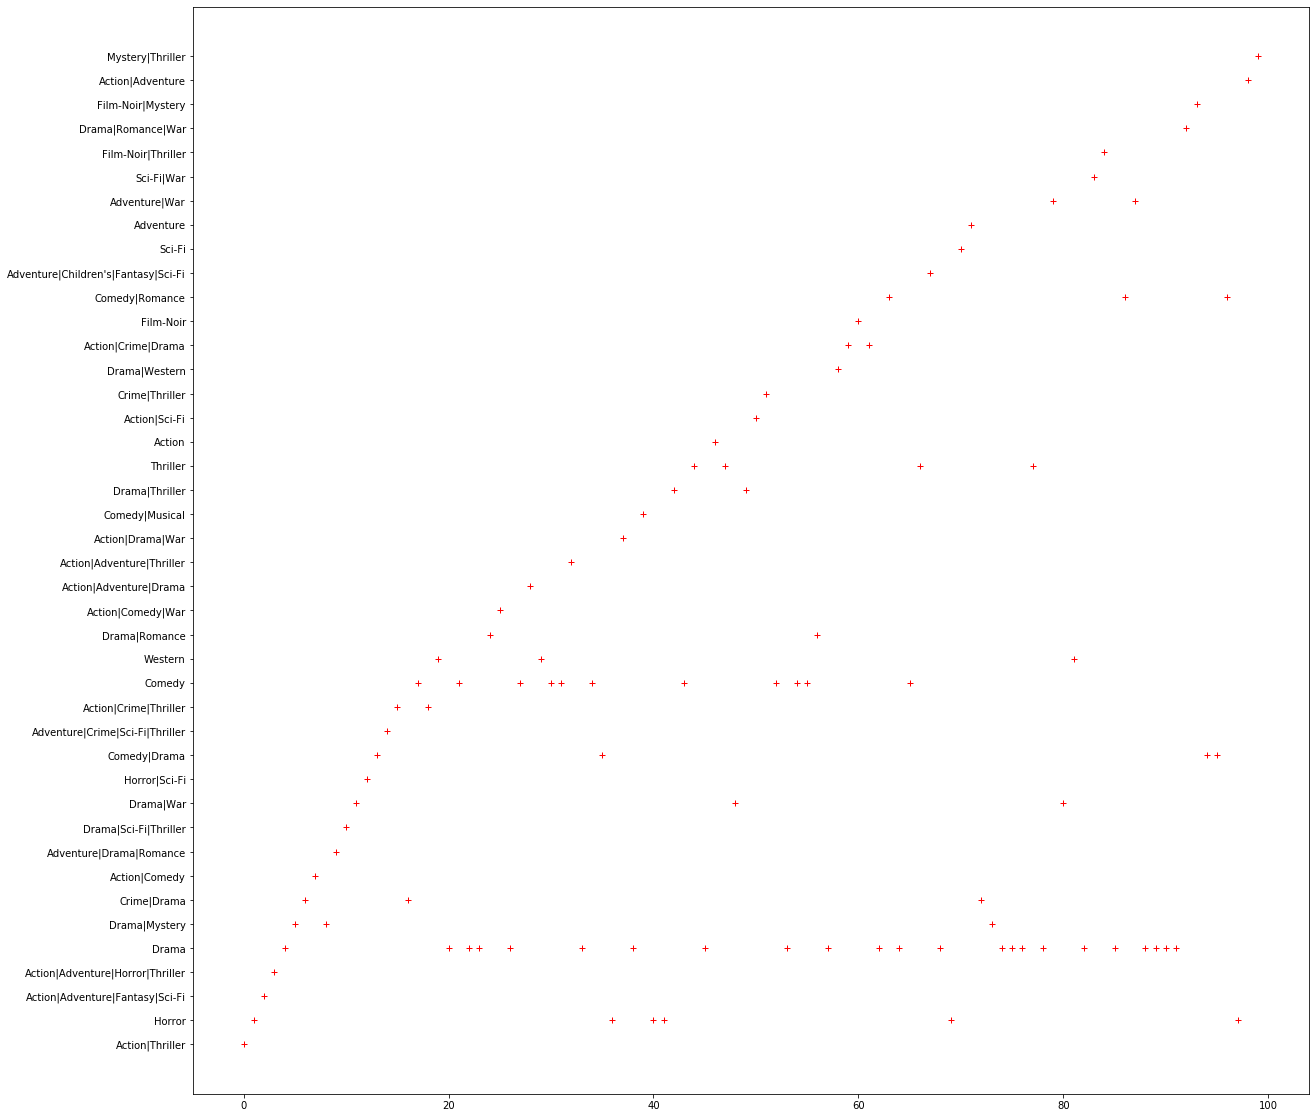

In [94]:
fig, ax1 = plt.subplots(figsize=(20, 20))

plt.plot(list(debug_issue_df.loc[debug_issue_df.uid == 4169].sort_values('timestamp')[:100].genres), 'r+')

In [95]:
M20_df = pd.read_csv("ml-20m/ratings.csv")
M20_movie_df = pd.read_csv('ml-20m/movies.csv')

In [96]:
M20_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [97]:
M20_movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
debug_issue20_df = pd.merge(M20_df, M20_movie_df, on='movieId')

In [99]:
from collections import Counter

ge_cnt = [k[0] for k in list(debug_issue20_df.groupby(['userId', 'genres']).count().index)]
cnt = Counter()
for ge in ge_cnt:
    cnt[ge] += 1

In [100]:
cnt.most_common()

[(8405, 766),
 (118205, 757),
 (34576, 715),
 (131904, 713),
 (74142, 703),
 (46470, 667),
 (54465, 663),
 (125794, 663),
 (59477, 661),
 (121535, 655),
 (24688, 652),
 (131894, 651),
 (82418, 640),
 (71975, 632),
 (18611, 603),
 (7201, 601),
 (88820, 601),
 (61168, 600),
 (79159, 597),
 (114406, 595),
 (130767, 595),
 (41267, 591),
 (53346, 587),
 (51703, 584),
 (137277, 584),
 (70201, 577),
 (43194, 576),
 (92269, 572),
 (4222, 571),
 (100366, 570),
 (120575, 566),
 (119048, 561),
 (106441, 559),
 (75810, 556),
 (18138, 549),
 (52260, 549),
 (31122, 544),
 (25978, 543),
 (131347, 543),
 (66533, 541),
 (123352, 541),
 (24219, 540),
 (86529, 539),
 (136268, 538),
 (12131, 537),
 (59407, 536),
 (97853, 536),
 (116317, 536),
 (22901, 534),
 (92011, 534),
 (15701, 533),
 (35128, 533),
 (3907, 531),
 (76630, 531),
 (58069, 530),
 (80771, 529),
 (123606, 528),
 (104345, 526),
 (118754, 525),
 (83090, 524),
 (34651, 523),
 (105580, 523),
 (9544, 521),
 (23180, 521),
 (64843, 521),
 (108248, 